In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
diabetes['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
diabetes.drop('smoking_history', axis=1, inplace=True)


In [7]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


Encode The Gender

In [8]:
diabetes['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [9]:
diabetes.groupby('gender').size()

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [10]:
diabetes = diabetes[diabetes['gender'] != 'Other']

In [11]:
diabetes.groupby('gender').size()

gender
Female    58552
Male      41430
dtype: int64

In [12]:
# diabetes['gender'].replace(['Female','Male'],[0,1],inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
diabetes['gender'] = le_sex.fit_transform(diabetes['gender'])
diabetes['gender'].unique()

array([0, 1])

In [14]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


<Axes: >

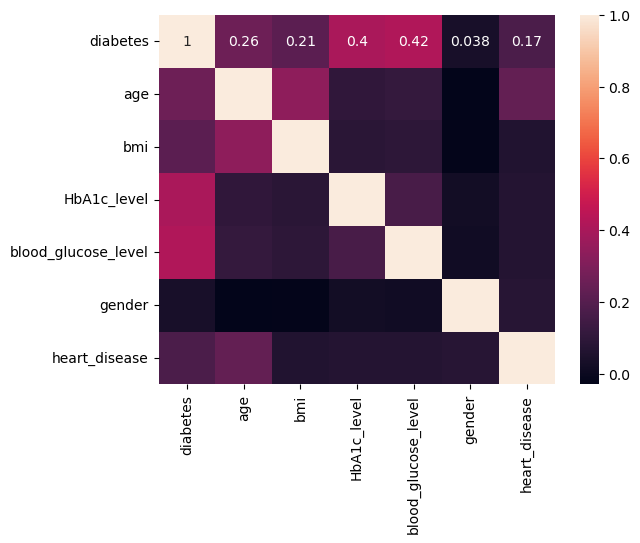

In [15]:
import seaborn as sns

sns.heatmap(diabetes[['diabetes','age','bmi','HbA1c_level','blood_glucose_level','gender','heart_disease']].corr(),annot = True)

<Axes: >

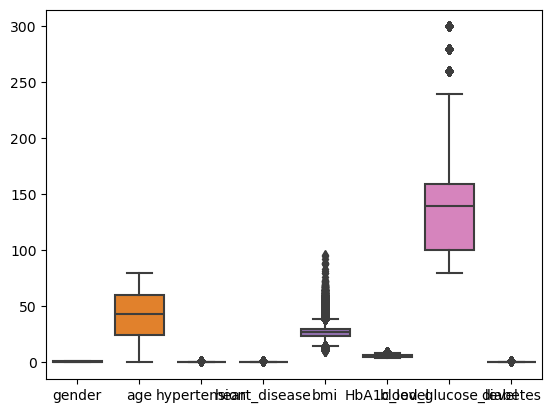

In [16]:
sns.boxplot(diabetes)

In [17]:
import numpy as np

# Assuming 'bmi' is the name of the column containing the BMI values in your DataFrame
bmi_values = diabetes['bmi']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(bmi_values, 25)
Q3 = np.percentile(bmi_values, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = sum((bmi_values < lower_bound) | (bmi_values > upper_bound))

print("Number of outliers in BMI feature:", outliers_count)


Number of outliers in BMI feature: 7085


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int32  
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   bmi                  99982 non-null  float64
 5   HbA1c_level          99982 non-null  float64
 6   blood_glucose_level  99982 non-null  int64  
 7   diabetes             99982 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 6.5 MB


Imputing Outliers

In [19]:
import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(diabetes['bmi'], 25)
Q3 = np.percentile(diabetes['bmi'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
diabetes_cleaned = diabetes[(diabetes['bmi'] >= lower_bound) & (diabetes['bmi'] <= upper_bound)]

# Print the shape of the cleaned DataFrame to see how many outliers were removed
print("Shape of original DataFrame:", diabetes.shape)
print("Shape of cleaned DataFrame:", diabetes_cleaned.shape)


Shape of original DataFrame: (99982, 8)
Shape of cleaned DataFrame: (92897, 8)


<Axes: >

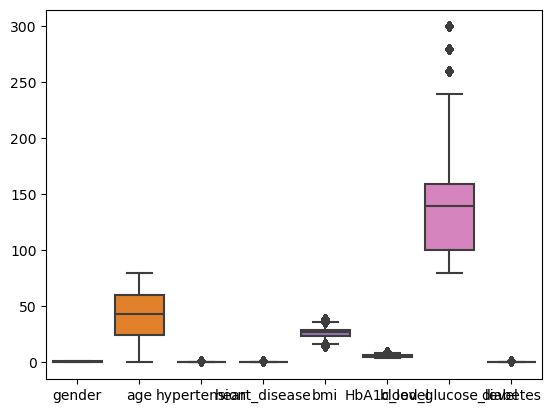

In [20]:
sns.boxplot(diabetes_cleaned)

In [21]:
X = diabetes_cleaned.drop(['diabetes'], axis = 1)
y = diabetes_cleaned['diabetes']

In [22]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.7)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(X_test, y_test)

0.9619649072446087

In [27]:
predict = model.predict(X_test)

In [28]:
print(predict)

[0 0 1 ... 0 0 0]


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25750
           1       0.85      0.61      0.71      2119

    accuracy                           0.96     27869
   macro avg       0.91      0.80      0.84     27869
weighted avg       0.96      0.96      0.96     27869



In [30]:
import pickle 

#saving the model and encoder

data = {"model": model,"le_sex": le_sex }
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)